<a href="https://colab.research.google.com/github/Trosadventures/QUANTITATIVE23/blob/main/ML_fundamentals_dic_4_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

#### December, 4th 2023

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.utils import plot_model
from keras.optimizers import SGD

# Toy Neural Network

In [3]:
init = tf.constant_initializer(np.array([0.8]))
toy_model = keras.Sequential([
    layers.Dense(1,
                 input_dim=1,
                 use_bias=False,
                 kernel_initializer=init)
])

print(toy_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
print(toy_model.get_weights())

[array([[0.8]], dtype=float32)]


In [5]:
toy_model.predict(x=np.array([1.5]))

1/1 [==============================] - 0s 313ms/step


array([[1.2]], dtype=float32)

In [6]:
toy_model.compile(optimizer=SGD(learning_rate=0.1),
                  loss="mean_squared_error")

X = np.array([1.5])
y = np.array([0.5])
toy_model_fit = toy_model.fit(
    X,
    y,
    epochs=1)

1/1 [==============================] - 0s 317ms/step - loss: 0.4900


In [7]:
print(toy_model.get_weights())

[array([[0.59]], dtype=float32)]


In [8]:
toy_model.predict(x=np.array([1.5]))

1/1 [==============================] - 0s 39ms/step


array([[0.885]], dtype=float32)

# Toy Neural Network v2

In [9]:
toy_model = keras.Sequential([
    layers.Dense(4,               # Hidden layer
                 input_dim=3),
    layers.Dense(1)               # Output layer
])

print(toy_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
print(toy_model.get_weights())

[array([[ 0.582592  , -0.48072958,  0.27911806,  0.41363454],
       [-0.8274647 , -0.76785165,  0.01096356, -0.31494826],
       [-0.40850562, -0.08862311, -0.09665531, -0.3651548 ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32), array([[-0.57627416],
       [-0.19267309],
       [ 0.02122509],
       [ 1.0608099 ]], dtype=float32), array([0.], dtype=float32)]


In [11]:
X = np.array([[1.5,2.5,3.5]])
y = np.array([0.5])

toy_model.predict(x=np.array([[1.5,2.5,3.5]]))

1/1 [==============================] - 0s 58ms/step


array([[0.5504756]], dtype=float32)

# Neural Network - Advertising dataset

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
advertising_df = pd.read_csv("drive/MyDrive/Advertising.csv")
advertising_df = advertising_df.iloc[:,1:]
advertising_df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [28]:
first_model = keras.Sequential([
    layers.Dense(16, activation='relu', # Hidden layer 1
                 input_dim=3),
    layers.Dense(32, activation='relu'),# Hidden layer 2
    layers.Dense(1, activation='relu'), # Output layer
])
print(first_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                64        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
first_model.compile(loss="mean_squared_error")

In [30]:
first_model_fit = first_model.fit(
    advertising_df[['TV','radio','newspaper']],
    advertising_df[['sales']],
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
5/5 [==============================] - 1s 65ms/step - loss: 160.6539 - val_loss: 121.5802
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 85.1943 - val_loss: 94.4523
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 65.6534 - val_loss: 65.2713
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 49.0066 - val_loss: 45.3861
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 32.9139 - val_loss: 45.2192
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 25.6471 - val_loss: 23.2013
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 15.3659 - val_loss: 18.2774
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 10.8740 - val_loss: 13.2829
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 8.0210 - val_loss: 12.3026
Epoch 10/100
5/5 [==============================] - 0s 20ms/step - loss: 8.6777 - val_loss: 8.7975


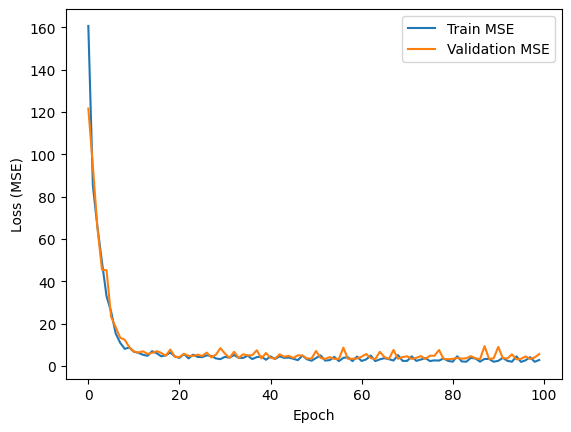

In [31]:
plt.plot(first_model_fit.history['loss'])
plt.plot(first_model_fit.history['val_loss'])
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train MSE', 'Validation MSE'], loc='upper right')
plt.show()

In [32]:
print(first_model.predict([[230.1,37.8,69.2]]))

1/1 [==============================] - 0s 101ms/step
[[19.2885]]


In [33]:
print(first_model.predict(advertising_df[['TV','radio','newspaper']].iloc[0:1,]))

1/1 [==============================] - 0s 81ms/step
[[19.2885]]


In [34]:
print(first_model.predict(advertising_df[['TV','radio','newspaper']].iloc[0:10,]))

1/1 [==============================] - 0s 21ms/step
[[19.2885   ]
 [10.885327 ]
 [ 8.205686 ]
 [16.53637  ]
 [12.711877 ]
 [ 7.332296 ]
 [10.439496 ]
 [10.9783945]
 [ 1.8111027]
 [ 9.386111 ]]


## Normalizing / Scaling

In [35]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(advertising_df)
advertising_df_scaled = pd.DataFrame(x_scaled)
advertising_df_scaled.head()

,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


In [36]:
advertising_df_descaled = pd.DataFrame(min_max_scaler.inverse_transform(x_scaled))
advertising_df_descaled

,0,1,2,3
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
